In [16]:
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report  

In [17]:
data_url = 'creditcard_2023.csv'
df = pd.read_csv(data_url)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [19]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [20]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


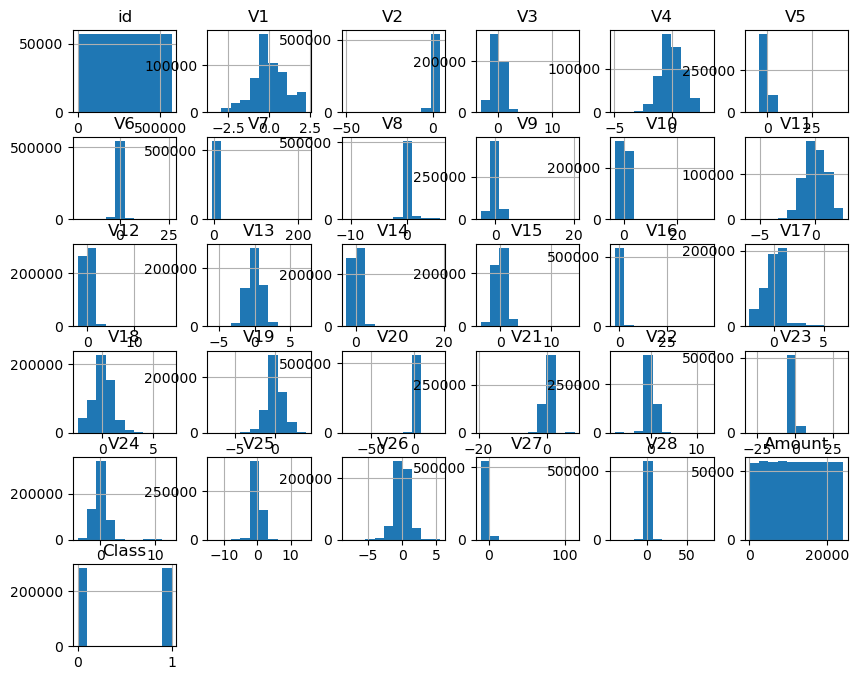

In [21]:
df.hist(figsize=(10, 8))
plt.show()

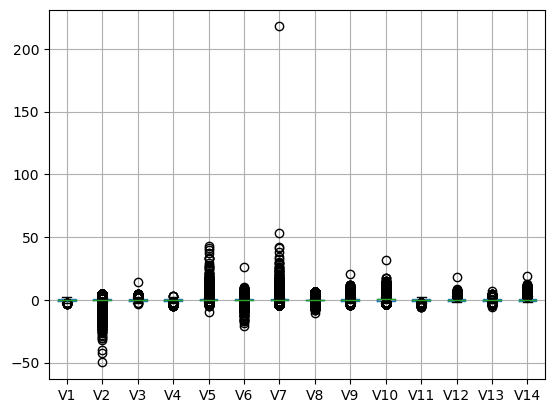

In [22]:
data_except = df.iloc[:, 1:-2]

num_features = len(data_except.columns)
first_half_cols = data_except.columns[:num_features // 2]
first_half_data = data_except[first_half_cols]

first_half_data.boxplot()
plt.show()

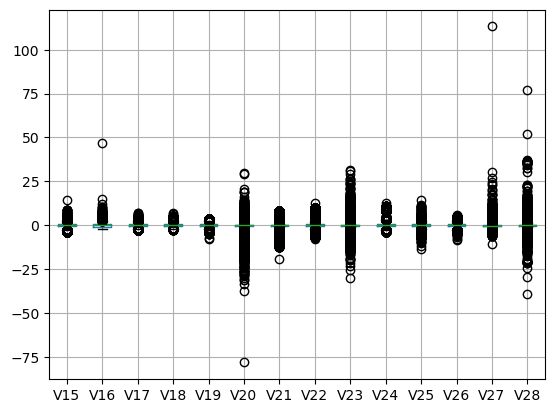

In [23]:
num_features = len(data_except.columns)
second_half_cols = data_except.columns[num_features // 2:]
second_half_data = data_except[second_half_cols]

second_half_data.boxplot()
plt.show()

In [24]:
fraud_counts = df['Class'].value_counts()
print(fraud_counts)

0    284315
1    284315
Name: Class, dtype: int64


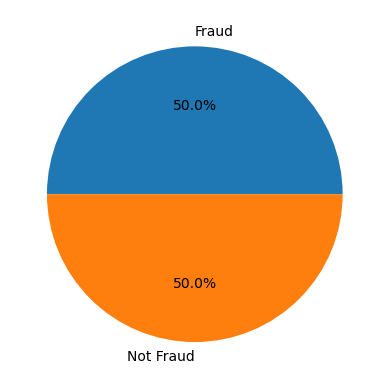

In [25]:
labels = ['Fraud', 'Not Fraud']
plt.pie(df['Class'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.show()

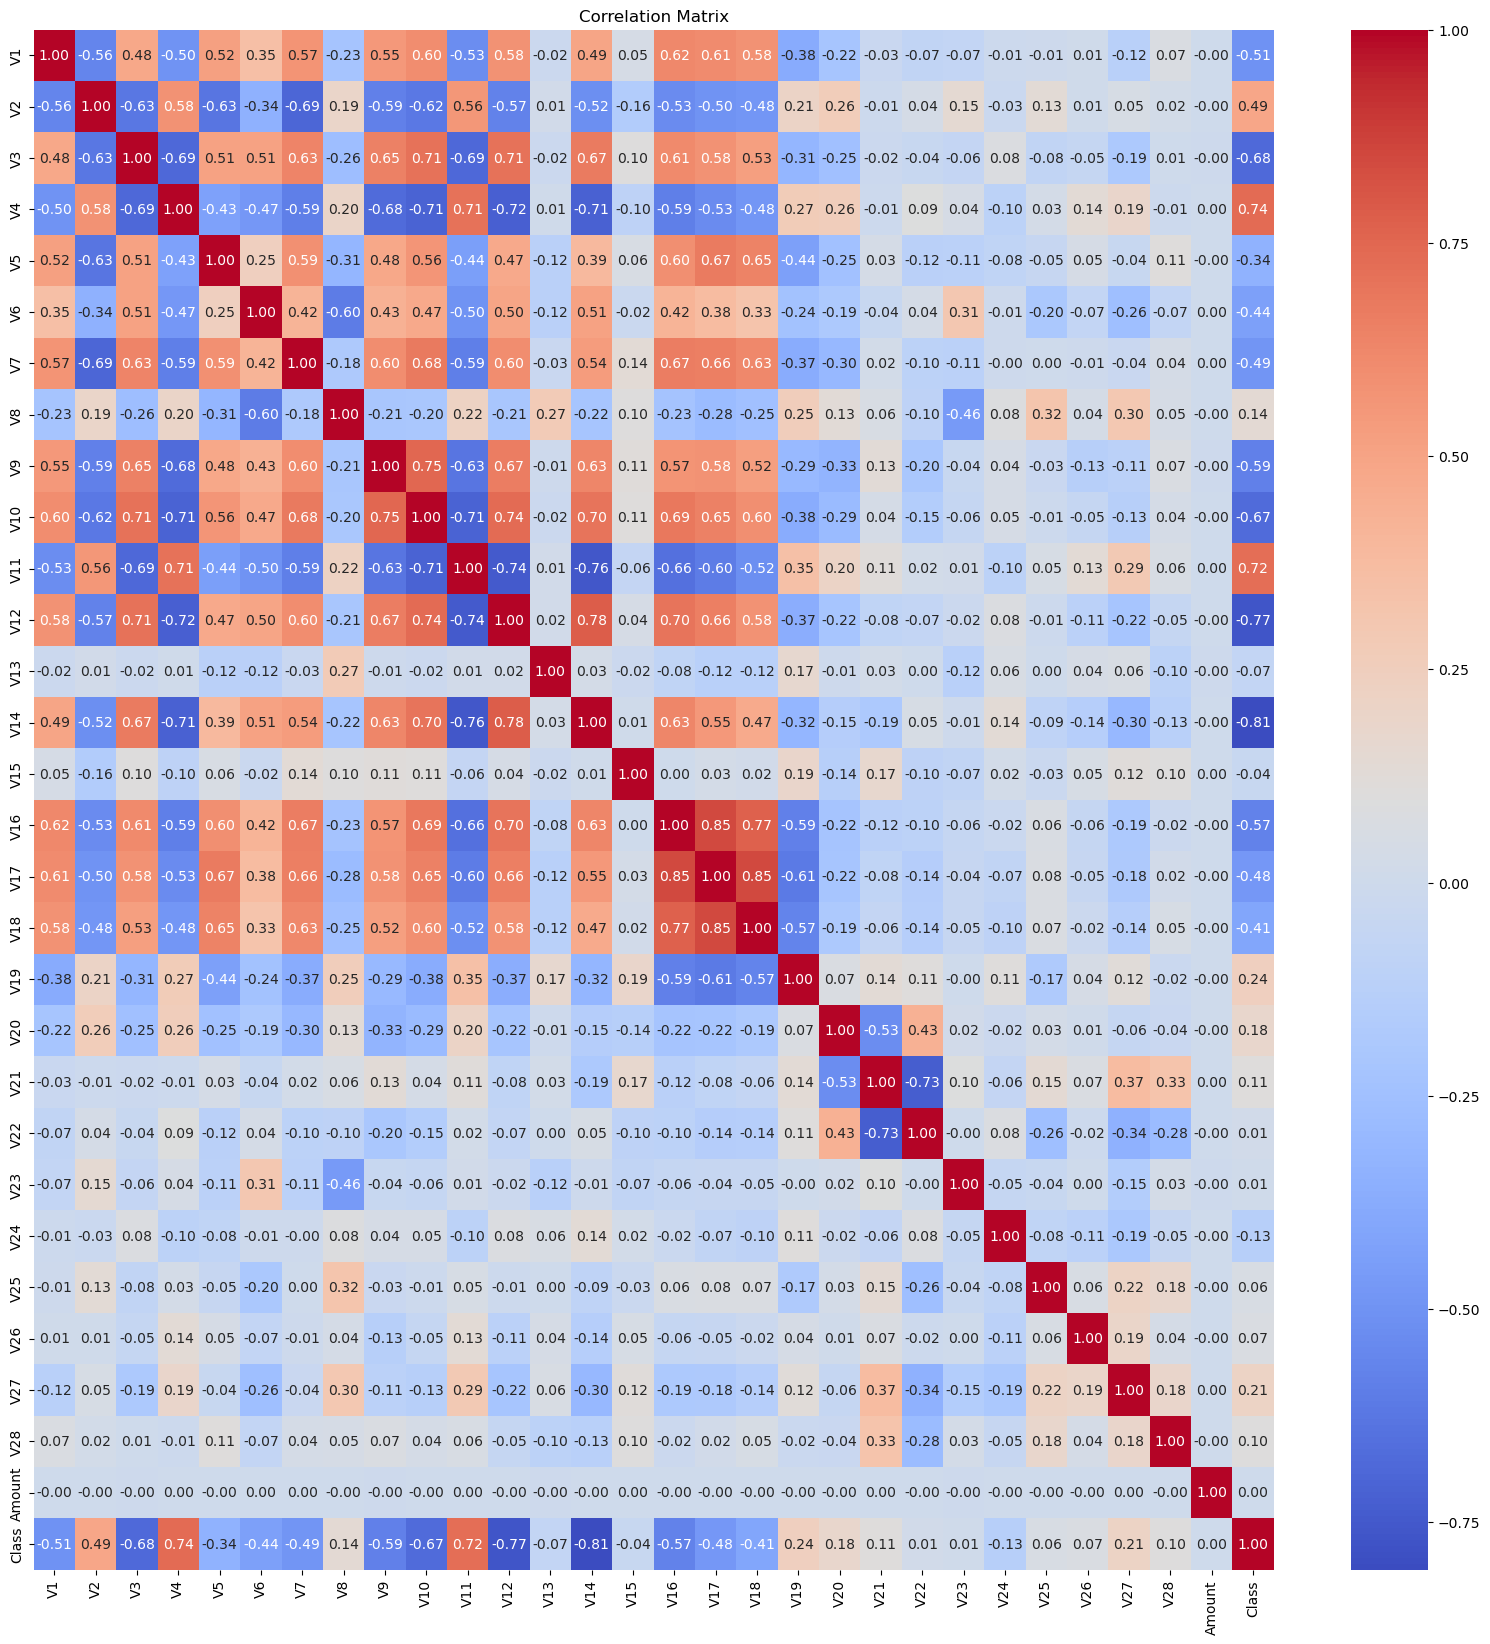

In [26]:
df.drop('id', axis = 1, inplace = True)
num_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [27]:
df.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [28]:
df.drop_duplicates(inplace = True)

In [29]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_dataset = df[~((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)]

print(filtered_dataset)
filtered_dataset.to_csv('Data2.csv', index = False)

              V1        V2        V3        V4        V5        V6        V7  \
0      -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1       0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
3      -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4      -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   
5       0.025302 -0.140514  1.191138 -0.707979  0.430490  0.458973  0.611050   
...          ...       ...       ...       ...       ...       ...       ...   
568619 -0.443917  0.243549  0.126811  0.400266 -0.326371  0.517670  0.086289   
568621 -0.739211  0.231882 -0.410204  0.511278  0.056859 -0.410720 -0.383799   
568624 -0.542349  0.585098 -0.547730  1.005465 -0.702046 -0.287417 -0.835174   
568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098 -0.070958   
568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148  0.580568   

              V8        V9       V10  .

In [30]:
# y = filtered_dataset['Class']
# X = filtered_dataset.drop('Class' , axis=1)

# model = RandomForestClassifier()
# model.fit(X, y)
# feature_importances = model.feature_importances_
# feature_names = filtered_dataset.drop('Class', axis=1).columns

# sorted_indices = feature_importances.argsort()[::-1]
# sorted_feature_names = feature_names[sorted_indices]
# sorted_feature_importances = feature_importances[sorted_indices]

# plt.barh(sorted_feature_names, sorted_feature_importances)
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature Names')
# plt.title('Sorted Feature Importances')
# plt.show()

# threshold = 0.02

# non_informative_features = sorted_feature_names[sorted_feature_importances < threshold]

# print("Non-Informative Features:", non_informative_features)

In [31]:
# df.drop(non_informative_features, axis=1, inplace=True)
# df.info()
# filtered_dataset.drop(non_informative_features, axis=1, inplace=True)
# filtered_dataset.info()